In [3]:
import pandas as pd
import numpy as np
import mysql.connector as sql
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler , StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report , confusion_matrix , accuracy_score , f1_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings;
warnings.filterwarnings('ignore')

In [2]:
mydb = sql.connect(host = 'localhost',
                  user = 'root',
                  passwd = '14920151',
                  use_pure = True,
                  database = 'loan_data')

print(mydb)

In [3]:
mycursor = mydb.cursor()

In [4]:
mycursor.execute('show databases')
for db in mycursor:
    print(db)

('aditya',)
('album',)
('db2',)
('information_schema',)
('loan_data',)
('myaditya',)
('mydatabase',)
('mysql',)
('new_schema',)
('performance_schema',)
('sql_hr',)
('sql_inventory',)
('sql_store',)
('sys',)
('test',)
('velocity_new',)
('world',)


In [5]:
mycursor.execute('select * from loan_data.simple_loan_data')
result = mycursor.fetchall()
for row in result:
    print(row)

('LP001002', 'Male', 'No', 0, 'Graduate', 'No', 5849, 0, '', 360, 1, 'Urban', 'Y')
('LP001003', 'Male', 'Yes', 1, 'Graduate', 'No', 4583, 1508, '128', 360, 1, 'Rural', 'N')
('LP001005', 'Male', 'Yes', 0, 'Graduate', 'Yes', 3000, 0, '66', 360, 1, 'Urban', 'Y')
('LP001006', 'Male', 'Yes', 0, 'Not Graduate', 'No', 2583, 2358, '120', 360, 1, 'Urban', 'Y')
('LP001008', 'Male', 'No', 0, 'Graduate', 'No', 6000, 0, '141', 360, 1, 'Urban', 'Y')
('LP001011', 'Male', 'Yes', 2, 'Graduate', 'Yes', 5417, 4196, '267', 360, 1, 'Urban', 'Y')
('LP001013', 'Male', 'Yes', 0, 'Not Graduate', 'No', 2333, 1516, '95', 360, 1, 'Urban', 'Y')
('LP001018', 'Male', 'Yes', 2, 'Graduate', 'No', 4006, 1526, '168', 360, 1, 'Urban', 'Y')
('LP001020', 'Male', 'Yes', 1, 'Graduate', 'No', 12841, 10968, '349', 360, 1, 'Semiurban', 'N')
('LP001024', 'Male', 'Yes', 2, 'Graduate', 'No', 3200, 700, '70', 360, 1, 'Urban', 'Y')
('LP001027', 'Male', 'Yes', 2, 'Graduate', '', 2500, 1840, '109', 360, 1, 'Urban', 'Y')
('LP001028', '

('LP002448', 'Male', 'Yes', 0, 'Graduate', 'No', 3948, 1733, '149', 360, 0, 'Rural', 'N')
('LP002449', 'Male', 'Yes', 0, 'Graduate', 'No', 2483, 2466, '90', 180, 0, 'Rural', 'Y')
('LP002453', 'Male', 'No', 0, 'Graduate', 'Yes', 7085, 0, '84', 360, 1, 'Semiurban', 'Y')
('LP002455', 'Male', 'Yes', 2, 'Graduate', 'No', 3859, 0, '96', 360, 1, 'Semiurban', 'Y')
('LP002459', 'Male', 'Yes', 0, 'Graduate', 'No', 4301, 0, '118', 360, 1, 'Urban', 'Y')
('LP002467', 'Male', 'Yes', 0, 'Graduate', 'No', 3708, 2569, '173', 360, 1, 'Urban', 'N')
('LP002472', 'Male', 'No', 2, 'Graduate', 'No', 4354, 0, '136', 360, 1, 'Rural', 'Y')
('LP002473', 'Male', 'Yes', 0, 'Graduate', 'No', 8334, 0, '160', 360, 1, 'Semiurban', 'N')
('LP002478', '', 'Yes', 0, 'Graduate', 'Yes', 2083, 4083, '160', 360, 0, 'Semiurban', 'Y')
('LP002487', 'Male', 'Yes', 0, 'Graduate', 'No', 3015, 2188, '153', 360, 1, 'Rural', 'Y')
('LP002489', 'Female', 'No', 1, 'Not Graduate', '', 5191, 0, '132', 360, 1, 'Semiurban', 'Y')
('LP002493',

In [6]:
df = pd.DataFrame(result)

In [7]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,LP001002,Male,No,0,Graduate,No,5849,0,,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,LP002974,Male,Yes,0,Graduate,No,3232,1950,108,360,1,Rural,Y
559,LP002978,Female,No,0,Graduate,No,2900,0,71,360,1,Rural,Y
560,LP002983,Male,Yes,1,Graduate,No,8072,240,253,360,1,Urban,Y
561,LP002984,Male,Yes,2,Graduate,No,7583,0,187,360,1,Urban,Y


In [8]:
mycursor.execute('DESCRIBE loan_data.simple_loan_data')
result1 = mycursor.fetchall()
print(result1)

[('Loan_ID', b'text', 'YES', '', None, ''), ('Gender', b'text', 'YES', '', None, ''), ('Married', b'text', 'YES', '', None, ''), ('Dependents', b'int', 'YES', '', None, ''), ('Education', b'text', 'YES', '', None, ''), ('Self_Employed', b'text', 'YES', '', None, ''), ('ApplicantIncome', b'int', 'YES', '', None, ''), ('CoapplicantIncome', b'int', 'YES', '', None, ''), ('LoanAmount', b'text', 'YES', '', None, ''), ('Loan_Amount_Term', b'int', 'YES', '', None, ''), ('Credit_History', b'int', 'YES', '', None, ''), ('Property_Area', b'text', 'YES', '', None, ''), ('Loan_Status', b'text', 'YES', '', None, '')]


In [9]:
column_list = []
for column in result1:
    column_list.append(column[0])
print(column_list)

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']


In [12]:
df = pd.DataFrame(result,columns=column_list)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,LP002974,Male,Yes,0,Graduate,No,3232,1950,108,360,1,Rural,Y
559,LP002978,Female,No,0,Graduate,No,2900,0,71,360,1,Rural,Y
560,LP002983,Male,Yes,1,Graduate,No,8072,240,253,360,1,Urban,Y
561,LP002984,Male,Yes,2,Graduate,No,7583,0,187,360,1,Urban,Y


In [2]:
df = pd.read_csv('simple_loan_data.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [38]:
# df.dropna(inplace=True)

In [3]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
percentage_missing = df.isna().sum()*100/len(df)
percentage_missing

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [5]:
missing_values_df = pd.DataFrame({'column_name':df.columns,
                                 'percentage_missing':percentage_missing,
                                 'No_missing_values':df.isna().sum()})

missing_values_df

,column_name,percentage_missing,No_missing_values
Loan_ID,Loan_ID,0.000000,0
Gender,Gender,2.117264,13
Married,Married,0.488599,3
Dependents,Dependents,2.442997,15
Education,Education,0.000000,0
Self_Employed,Self_Employed,5.211726,32
ApplicantIncome,ApplicantIncome,0.000000,0
CoapplicantIncome,CoapplicantIncome,0.000000,0
LoanAmount,LoanAmount,3.583062,22
Loan_Amount_Term,Loan_Amount_Term,2.280130,14


In [42]:
missing_values_df.sort_values(by ='percentage_missing' )

,column_name,percentage_missing,No_missing_values
Loan_ID,Loan_ID,0.000000,0
Education,Education,0.000000,0
ApplicantIncome,ApplicantIncome,0.000000,0
CoapplicantIncome,CoapplicantIncome,0.000000,0
Property_Area,Property_Area,0.000000,0
Loan_Status,Loan_Status,0.000000,0
Married,Married,0.488599,3
Gender,Gender,2.117264,13
Loan_Amount_Term,Loan_Amount_Term,2.280130,14
Dependents,Dependents,2.442997,15


In [43]:
missing_values_df.sort_values(by ='percentage_missing' ,ascending=False)

,column_name,percentage_missing,No_missing_values
Credit_History,Credit_History,8.143322,50
Self_Employed,Self_Employed,5.211726,32
LoanAmount,LoanAmount,3.583062,22
Dependents,Dependents,2.442997,15
Loan_Amount_Term,Loan_Amount_Term,2.280130,14
Gender,Gender,2.117264,13
Married,Married,0.488599,3
Loan_ID,Loan_ID,0.000000,0
Education,Education,0.000000,0
ApplicantIncome,ApplicantIncome,0.000000,0


<AxesSubplot:>

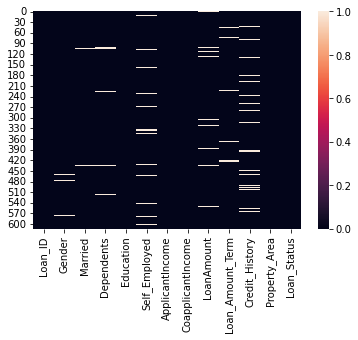

In [9]:
sns.heatmap(df.isna())

In [6]:
categorical_cols = ['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History']
for col in categorical_cols:
    print(f'Value_counts of {col.upper()} :')
    print(df[col].value_counts())
    print()
    

Value_counts of GENDER :
Male      489
Female    112
Name: Gender, dtype: int64

Value_counts of MARRIED :
Yes    398
No     213
Name: Married, dtype: int64

Value_counts of DEPENDENTS :
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Value_counts of EDUCATION :
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Value_counts of SELF_EMPLOYED :
No     500
Yes     82
Name: Self_Employed, dtype: int64

Value_counts of LOAN_AMOUNT_TERM :
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

Value_counts of CREDIT_HISTORY :
1.0    475
0.0     89
Name: Credit_History, dtype: int64



In [11]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## Handling_null_values

In [7]:
df['Gender'].mode()[0]

'Male'

In [8]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

In [9]:
df.isna().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
df['Married'].mode()[0]

'Yes'

In [11]:
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

In [12]:
df['Dependents'].mode()[0]

'0'

In [13]:
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

In [14]:
df['Self_Employed'].mode()[0]

'No'

In [15]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

In [16]:
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
df['LoanAmount'].mode()[0]

120.0

In [18]:
df.groupby('Loan_Status').get_group('N')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
13,LP001029,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,N
17,LP001036,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,LP002941,Male,Yes,2,Not Graduate,Yes,6383,1000.0,187.0,360.0,1.0,Rural,N
597,LP002943,Male,No,0,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N
600,LP002949,Female,No,3+,Graduate,No,416,41667.0,350.0,180.0,NaN,Urban,N
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,N


In [19]:
df.groupby('Loan_Status').get_group('N')['LoanAmount'].mean()

151.22099447513813

In [20]:
mean_N =  df.groupby('Loan_Status').get_group('N')['LoanAmount'].mean()

In [21]:
df.groupby('Loan_Status').get_group('Y')['LoanAmount'].mean()

144.29440389294405

In [22]:
mean_Y =  df.groupby('Loan_Status').get_group('Y')['LoanAmount'].mean()

In [23]:
df.loc[df['Loan_Status']=='N','LoanAmount'] = df.loc[df['Loan_Status']=='N','LoanAmount'].fillna(df.loc[df['Loan_Status']=='N','LoanAmount'].mean())

In [24]:
df.loc[df['Loan_Status']=='Y','LoanAmount'] = df.loc[df['Loan_Status']=='Y','LoanAmount'].fillna(df.loc[df['Loan_Status']=='Y','LoanAmount'].mean())

In [25]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [26]:
df['Loan_Amount_Term'].mode()[0]

360.0

In [27]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [28]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [29]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [30]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<AxesSubplot:>

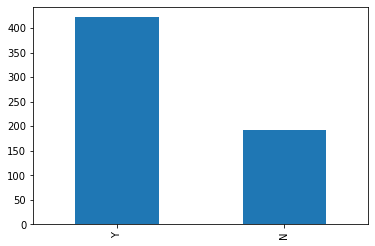

In [31]:
df['Loan_Status'].value_counts().plot.bar()

<AxesSubplot:>

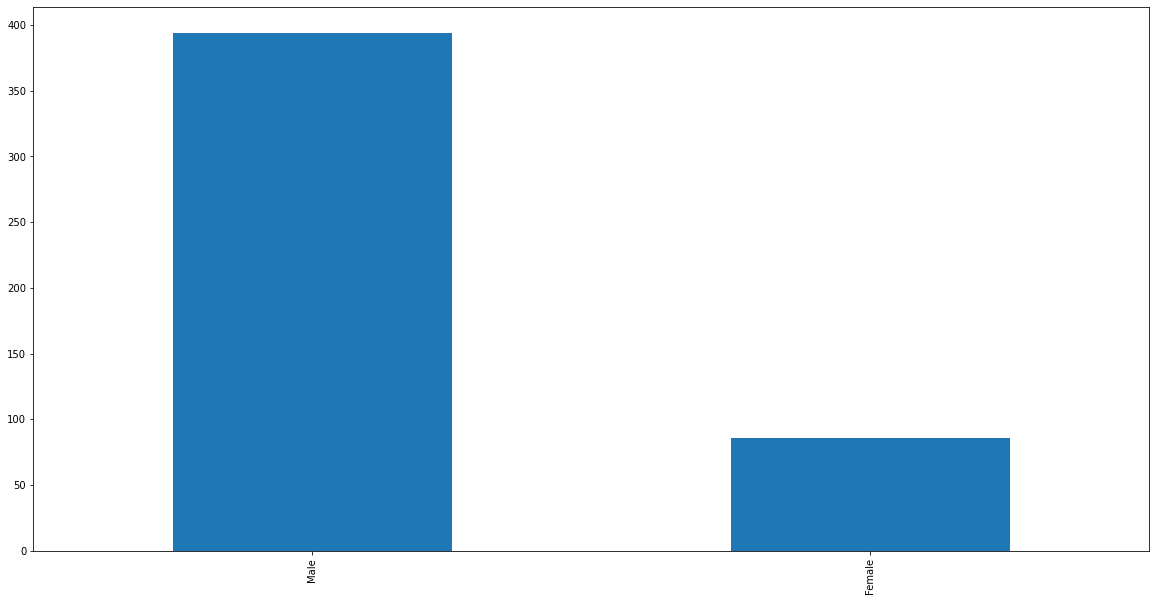

In [17]:
df['Gender'].value_counts().plot.bar(figsize = (20,10))

<AxesSubplot:title={'center':'Gender'}>

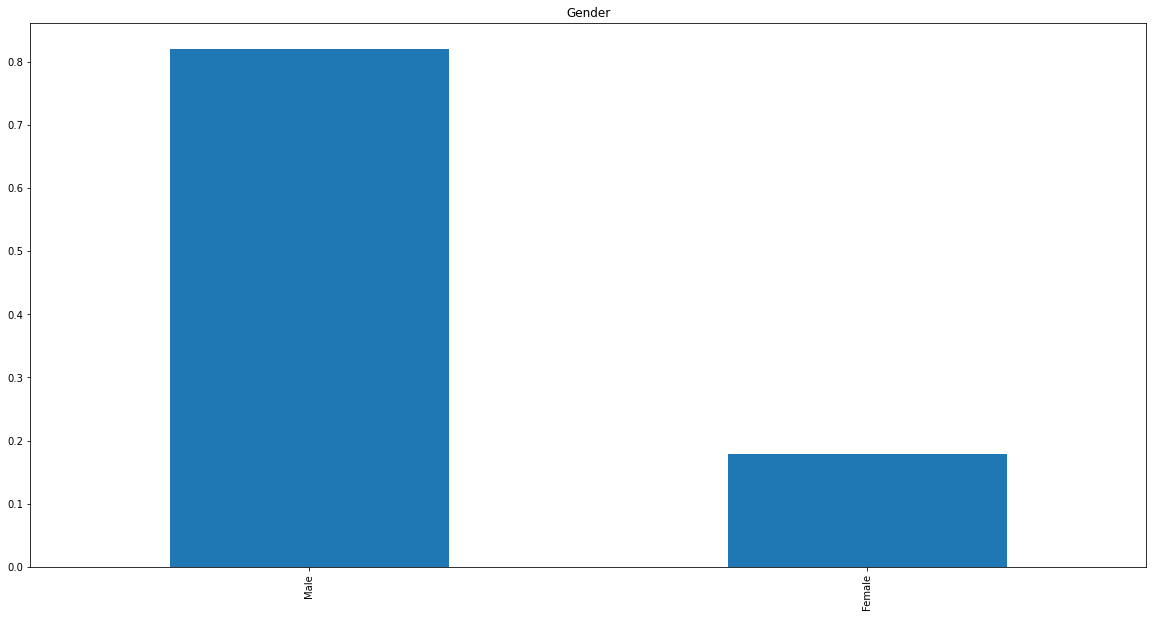

In [18]:
df['Gender'].value_counts(normalize=True).plot.bar(figsize = (20,10),title = 'Gender')

In [21]:
gender

Loan_Status,N,Y
Gender,,
Female,32,54
Male,116,278


<AxesSubplot:xlabel='Gender'>

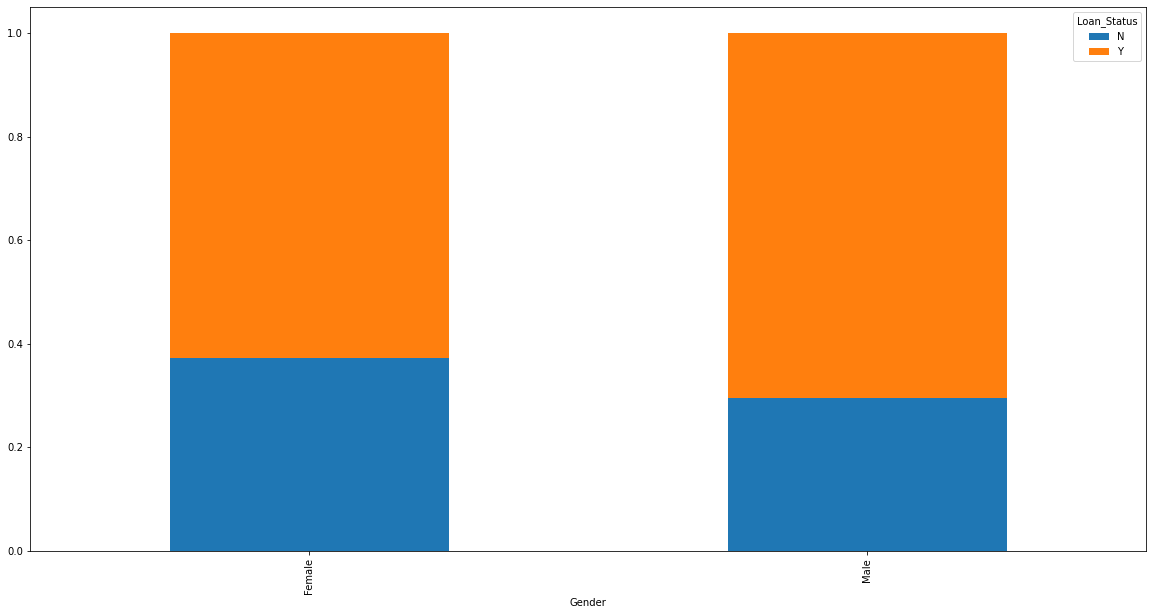

In [20]:
gender = pd.crosstab(df['Gender'],df['Loan_Status'])
gender.div(gender.sum(1).astype(float),axis = 0).plot(kind = 'bar',stacked = True,figsize = (20,10))

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

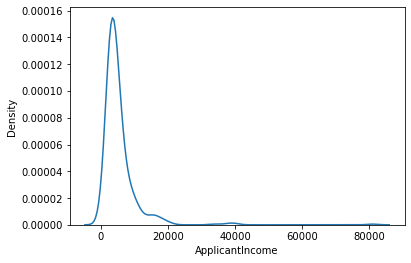

In [22]:
sns.kdeplot(x = df['ApplicantIncome'])

In [25]:
df['ApplicantIncome'].min()

150

In [23]:
df['ApplicantIncome'].quantile(.98)

17779.30000000001

In [24]:
df['ApplicantIncome'].quantile([0.95,.98,0.99,0.9995])

0.9500    14583.0000
0.9800    17779.3000
0.9900    23091.7300
0.9995    71180.2605
Name: ApplicantIncome, dtype: float64

In [26]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [29]:
categorical_cols = ['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History']
for col in categorical_cols:
    print(f'Value_counts of {col.upper()} :')
    print(df[col].value_counts())
    print()
    

In [31]:
for col in categorical_cols:
    print(f'Value_counts of {col.upper()} :')
    print(df[col].value_counts())
    print()
    

Value_counts of GENDER :
Male      394
Female     86
Name: Gender, dtype: int64

Value_counts of MARRIED :
Yes    311
No     169
Name: Married, dtype: int64

Value_counts of DEPENDENTS :
0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

Value_counts of EDUCATION :
Graduate        383
Not Graduate     97
Name: Education, dtype: int64

Value_counts of SELF_EMPLOYED :
No     414
Yes     66
Name: Self_Employed, dtype: int64

Value_counts of LOAN_AMOUNT_TERM :
360.0    411
180.0     36
480.0     12
300.0      9
120.0      3
84.0       3
60.0       2
240.0      2
36.0       2
Name: Loan_Amount_Term, dtype: int64

Value_counts of CREDIT_HISTORY :
1.0    410
0.0     70
Name: Credit_History, dtype: int64



In [32]:
for col in categorical_cols:
    print(f'nunique of {col.upper()} :')
    print(df[col].nunique())
    print()

nunique of GENDER :
2

nunique of MARRIED :
2

nunique of DEPENDENTS :
4

nunique of EDUCATION :
2

nunique of SELF_EMPLOYED :
2

nunique of LOAN_AMOUNT_TERM :
9

nunique of CREDIT_HISTORY :
2



In [73]:
for col in categorical_cols:
    print(f'unique of {col.upper()} :')
    print(df[col].unique())
    print()

unique of GENDER :
['Male' 'Female']

unique of MARRIED :
['No' 'Yes']

unique of DEPENDENTS :
['0' '1' '2' '3+']

unique of EDUCATION :
['Graduate' 'Not Graduate']

unique of SELF_EMPLOYED :
['No' 'Yes']

unique of LOAN_AMOUNT_TERM :
[360. 120. 240. 180.  60. 300. 480.  36.  84.  12.]

unique of CREDIT_HISTORY :
[1. 0.]



In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Encoding Variables

In [32]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [33]:
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [34]:
df['Gender'].value_counts().to_dict()

{'Male': 502, 'Female': 112}

In [35]:
df['Gender'].replace({'Male': 1, 'Female': 0},inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


In [37]:
df['Married'].value_counts().to_dict()

{'Yes': 401, 'No': 213}

In [38]:
df['Married'].replace({'Yes': 1, 'No': 0},inplace=True)

In [39]:
df['Dependents'].value_counts().to_dict()

{'0': 360, '1': 102, '2': 101, '3+': 51}

In [40]:
df['Dependents'].replace({'0': 0, '1': 1, '2': 2, '3+': 3},inplace=True)

In [41]:
df['Education'].value_counts().to_dict()

{'Graduate': 480, 'Not Graduate': 134}

In [42]:
df['Education'].replace({'Graduate': 1, 'Not Graduate': 0},inplace=True)

In [43]:
# df['Dependents'].value_counts()

In [44]:
df['Self_Employed'].value_counts().to_dict()

{'No': 532, 'Yes': 82}

In [45]:
df['Self_Employed'].replace({'No': 0, 'Yes': 1},inplace=True)

In [46]:
df['Property_Area'].value_counts().to_dict()

{'Semiurban': 233, 'Urban': 202, 'Rural': 179}

In [47]:
df['Property_Area'].replace({'Semiurban': 1, 'Urban': 0, 'Rural': 2},inplace=True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(7), object(2)
memory usage: 62.5+ KB


## Train Test split

In [49]:
x = df.drop(['Loan_ID','Loan_Status'],axis = 1)
y = df['Loan_Status']

In [50]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size= 0.2 , random_state=45, stratify=y)

In [51]:
x_train.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [52]:
len(x_train)

491

In [53]:
len(x_test)

123

### Train Logistic Regression

In [54]:
log_clf = LogisticRegression()
log_clf.fit(x_train,y_train)

LogisticRegression()

# Evaluation

In [55]:
## Testing data evalution
y_pred_log = log_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test , y_pred_log)
print('Confusion Matrix : \n',cnf_matrix)
print()

acc_score_LR = accuracy_score(y_test,y_pred_log)
print('Accuracy Score:',acc_score_LR)

clf_report = classification_report(y_test , y_pred_log)
print('classification report :',clf_report)


Confusion Matrix : 
 [[17 21]
 [ 0 85]]

Accuracy Score: 0.8292682926829268
classification report :               precision    recall  f1-score   support

           N       1.00      0.45      0.62        38
           Y       0.80      1.00      0.89        85

    accuracy                           0.83       123
   macro avg       0.90      0.72      0.75       123
weighted avg       0.86      0.83      0.81       123



In [56]:
## Training data evalution
y_pred_train_log = log_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train , y_pred_train_log)
print('Confusion Matrix : \n',cnf_matrix)
print()

acc_score_LR_train = accuracy_score(y_train,y_pred_train_log)
print('Accuracy Score:',acc_score_LR_train)

clf_report = classification_report(y_train , y_pred_train_log)
print('classification report :',clf_report)

Confusion Matrix : 
 [[ 65  89]
 [  8 329]]

Accuracy Score: 0.8024439918533605
classification report :               precision    recall  f1-score   support

           N       0.89      0.42      0.57       154
           Y       0.79      0.98      0.87       337

    accuracy                           0.80       491
   macro avg       0.84      0.70      0.72       491
weighted avg       0.82      0.80      0.78       491



## Knn 

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


In [58]:
std_scaler = StandardScaler()
std_scaler.fit(x_train)

StandardScaler()

In [59]:
x_train_std = std_scaler.fit_transform(x_train)
x_test_std = std_scaler.transform(x_test)

In [60]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train_std,y_train)

KNeighborsClassifier()

In [61]:
## Testing data evalution
y_pred_knn = knn_model.predict(x_test_std)

cnf_matrix = confusion_matrix(y_test , y_pred_knn)
print('Confusion Matrix : \n',cnf_matrix)
print()

acc_score_test_knn = accuracy_score(y_test,y_pred_knn)
print('Accuracy Score:',acc_score_test_knn)

clf_report = classification_report(y_test , y_pred_knn)
print('classification report :',clf_report)

Confusion Matrix : 
 [[17 21]
 [ 5 80]]

Accuracy Score: 0.7886178861788617
classification report :               precision    recall  f1-score   support

           N       0.77      0.45      0.57        38
           Y       0.79      0.94      0.86        85

    accuracy                           0.79       123
   macro avg       0.78      0.69      0.71       123
weighted avg       0.79      0.79      0.77       123



In [62]:
## Training data evalution
y_pred_knn_train = knn_model.predict(x_train_std)

cnf_matrix = confusion_matrix(y_train , y_pred_knn_train)
print('Confusion Matrix : \n',cnf_matrix)
print()

acc_score_train_knn = accuracy_score(y_train,y_pred_knn_train)
print('Accuracy Score:',acc_score_train_knn)

clf_report = classification_report(y_train , y_pred_knn_train)
print('classification report :',clf_report)

Confusion Matrix : 
 [[ 79  75]
 [ 12 325]]

Accuracy Score: 0.8228105906313645
classification report :               precision    recall  f1-score   support

           N       0.87      0.51      0.64       154
           Y       0.81      0.96      0.88       337

    accuracy                           0.82       491
   macro avg       0.84      0.74      0.76       491
weighted avg       0.83      0.82      0.81       491



In [78]:
rscv_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       min_samples_split=4)

## Decision tree

In [90]:
# dt_model = DecisionTreeClassifier()
dt_model = rscv_model.best_estimator_
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=29, min_samples_leaf=8,
                       min_samples_split=8)

In [91]:
## Testing data evalution
y_pred_dt = dt_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test , y_pred_dt)
print('Confusion Matrix : \n',cnf_matrix)
print()

acc_score_test_dt = accuracy_score(y_test,y_pred_dt)
print('Accuracy Score:',acc_score_test_dt)

clf_report = classification_report(y_test , y_pred_dt)
print('classification report :',clf_report)

Confusion Matrix : 
 [[19 19]
 [14 71]]

Accuracy Score: 0.7317073170731707
classification report :               precision    recall  f1-score   support

           N       0.58      0.50      0.54        38
           Y       0.79      0.84      0.81        85

    accuracy                           0.73       123
   macro avg       0.68      0.67      0.67       123
weighted avg       0.72      0.73      0.73       123



In [93]:
## Training data evalution
y_pred_dt_train = dt_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train , y_pred_dt_train)
print('Confusion Matrix : \n',cnf_matrix)
print()

acc_score_train_dt = accuracy_score(y_train,y_pred_dt_train)
print('Accuracy Score:',acc_score_train_dt)

clf_report = classification_report(y_train , y_pred_dt_train)
print('classification report :',clf_report)

Confusion Matrix : 
 [[119  35]
 [ 36 301]]

Accuracy Score: 0.8553971486761711
classification report :               precision    recall  f1-score   support

           N       0.77      0.77      0.77       154
           Y       0.90      0.89      0.89       337

    accuracy                           0.86       491
   macro avg       0.83      0.83      0.83       491
weighted avg       0.86      0.86      0.86       491



In [70]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# 'max_depth': [5,10,15,20,40]

In [88]:
dt_model = DecisionTreeClassifier()
hyp = {'criterion':['gini','entropy'],
    'max_depth':np.arange(5,30),
    'min_samples_split':np.arange(2,10),
    'min_samples_leaf':np.arange(2,10)}

rscv_model = RandomizedSearchCV(dt_model,hyp,cv = 5 , random_state=5)
rscv_model.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
                   random_state=5)

In [89]:
rscv_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=29, min_samples_leaf=8,
                       min_samples_split=8)

## Random forest

In [94]:
# bagging and boosting
from sklearn.ensemble import RandomForestClassifier


In [100]:
# rf_model = RandomForestClassifier()
rscv_model.best_estimator_
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [101]:
## Testing data evalution
y_pred_rf = rf_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test , y_pred_rf)
print('Confusion Matrix : \n',cnf_matrix)
print()

acc_score_test_rf = accuracy_score(y_test,y_pred_rf)
print('Accuracy Score:',acc_score_test_rf)

clf_report = classification_report(y_test , y_pred_rf)
print('classification report :',clf_report)

Confusion Matrix : 
 [[18 20]
 [ 7 78]]

Accuracy Score: 0.7804878048780488
classification report :               precision    recall  f1-score   support

           N       0.72      0.47      0.57        38
           Y       0.80      0.92      0.85        85

    accuracy                           0.78       123
   macro avg       0.76      0.70      0.71       123
weighted avg       0.77      0.78      0.77       123



In [102]:
## Training data evalution
y_pred_rf_train = rf_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train , y_pred_rf_train)
print('Confusion Matrix : \n',cnf_matrix)
print()

acc_score_train_rf = accuracy_score(y_train,y_pred_dt_train)
print('Accuracy Score:',acc_score_train_rf)

clf_report = classification_report(y_train , y_pred_dt_train)
print('classification report :',clf_report)

Confusion Matrix : 
 [[154   0]
 [  0 337]]

Accuracy Score: 0.8553971486761711
classification report :               precision    recall  f1-score   support

           N       0.77      0.77      0.77       154
           Y       0.90      0.89      0.89       337

    accuracy                           0.86       491
   macro avg       0.83      0.83      0.83       491
weighted avg       0.86      0.86      0.86       491



In [98]:
rf_model = RandomForestClassifier()
hyp = {'criterion':['gini','entropy'],
    'max_depth':np.arange(5,30),
    'min_samples_split':np.arange(2,10),
    'min_samples_leaf':np.arange(2,10),
      'n_estimators':np.arange(60,100)}

rscv_model = RandomizedSearchCV(rf_model,hyp ,random_state=45 , cv = 5)
rscv_model.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76,
       77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93,
       94, 95, 96, 97, 98, 99])},
                   random_state=45)

In [99]:
rscv_model.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=27, min_samples_leaf=6,
                       min_samples_split=7, n_estimators=63)

<AxesSubplot:>

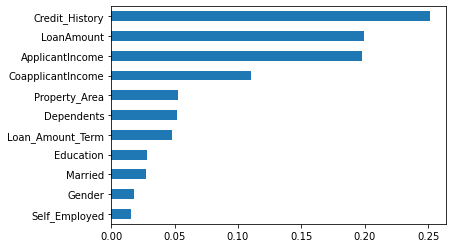

In [104]:
s1 = pd.Series(rf_model.feature_importances_,index=x.columns)
s1.sort_values().plot(kind = 'barh')

In [107]:
print('Acc_score_LR:',acc_score_LR,'Acc_score_knn',acc_score_test_knn,'Acc_score_dt :',acc_score_test_dt,'acc_score_rf :',acc_score_test_rf,sep='\n')

Acc_score_LR:
0.8292682926829268
Acc_score_knn
0.7886178861788617
Acc_score_dt :
0.7317073170731707
acc_score_rf :
0.7804878048780488


In [108]:
import pickle

In [109]:
pickle.dump(log_clf,open('log_model.pickle','wb'))

In [110]:
test_point = x_test[6:7]

In [111]:
test_point

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
48,0,1,0,1,0,2645,3440.0,120.0,360.0,0.0,0


In [112]:
prediction = log_clf.predict(test_point)
prediction

array(['N'], dtype=object)

In [113]:
prediction[0]

'N'

In [4]:
mydb = sql.connect(host = 'localhost',
                  user = 'root',
                  passwd = '14920151',
                  use_pure = True,
                  database = 'loan_data')

print(mydb)

In [5]:
mycursor = mydb.cursor()

In [117]:
test_point

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
48,0,1,0,1,0,2645,3440.0,120.0,360.0,0.0,0


In [119]:
test_point.to_dict()

{'Gender': {48: 0},
 'Married': {48: 1},
 'Dependents': {48: 0},
 'Education': {48: 1},
 'Self_Employed': {48: 0},
 'ApplicantIncome': {48: 2645},
 'CoapplicantIncome': {48: 3440.0},
 'LoanAmount': {48: 120.0},
 'Loan_Amount_Term': {48: 360.0},
 'Credit_History': {48: 0.0},
 'Property_Area': {48: 0}}

In [ ]:
{'Gender': {48: 0},
 'Married': {48: 1},
 'Dependents': {48: 0},
 'Education': {48: 1},
 'Self_Employed': {48: 0},
 'ApplicantIncome': {48: 2645},
 'CoapplicantIncome': {48: 3440.0},
 'LoanAmount': {48: 120.0},
 'Loan_Amount_Term': {48: 360.0},
 'Credit_History': {48: 0.0},
 'Property_Area': {48: 0}}

In [120]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [15]:
insert_query = ("""INSERT INTO loan_data.new_loan_data (Gender,
Married,
Dependents,
Education,
Self_Employed,
ApplicantIncome,
CoapplicantIncome,
LoanAmount,
Loan_Amount_Term,
Credit_History,
Property_Area,
Loan_Status
)
VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)
""") 

data = (0,0,2,1,0,2222,4545,120,360,1,1,1)

In [16]:
try:
    mycursor.execute(insert_query,data)
    mydb.commit()
    print('We are in try block')
except:
    mydb.rollback()
    print('We are in except block')
    


We are in except block


Traceback (most recent call last):
  File "C:\Users\pc\AppData\Local\Temp/ipykernel_15492/3777871370.py", line 2, in <module>
    mycursor.execute(insert_query,data)
  File "C:\Users\pc\anaconda3\lib\site-packages\mysql\connector\cursor.py", line 572, in execute
    self._handle_result(self._connection.cmd_query(stmt))
  File "C:\Users\pc\anaconda3\lib\site-packages\mysql\connector\connection.py", line 920, in cmd_query
    result = self._handle_result(self._send_cmd(ServerCmd.QUERY, query))
  File "C:\Users\pc\anaconda3\lib\site-packages\mysql\connector\connection.py", line 730, in _handle_result
    raise errors.get_exception(packet)
mysql.connector.errors.ProgrammingError: 1054 (42S22): Unknown column 'Loan_Status' in 'field list'
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._cal

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\pc\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote